# 一、基于SVM算法的MNIST数据集手写数字识别

环境：python 3.11.5

## 1、数据集介绍

MNIST数据集是一个用于手写数字识别的经典机器学习数据集，含有60000个训练样本和10000个测试样本。每个样本为28*28像素的灰度图像,每个像素的取值范围为[0，255]。数据集分为训练集和测试集，用于训练和评估机器学习模型。
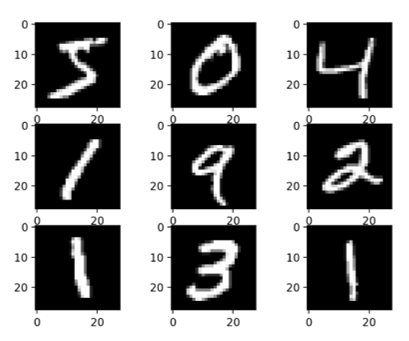

数据集网址为:https://www.heywhale.com/mw/dataset/5f9ecd9dca48e000300cc21b/file

## 2、对数据进行标准化 

由于数据集中每个图片的大小为28*28像素，且像素值范围为[0,255]，不便于分析，为了便于进行分析对数据进行标准化。标准化步骤为：二值化  >>>  样本展开为一维。

**二值化**:通过基于平均值的二值化方法进行二值化，其公式为：

$$
\text{mean\_value} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

$$
x_i = 
\begin{cases} 
      1 & \text{if } x_i \geq \text{mean\_value} \\
      0 & \text{if } x_i < \text{mean\_value}
\end{cases}
$$

**样本展开为一维**:将28×28的图像数据展平到一维对 SVM 有诸多好处。展开后的784维特征空间便于线性分离，简化了模型，兼容了 SVM 对向量化数据的需求，同时也避免了高计算复杂度。尽管这种做法丢失了空间关系信息，但对手写数字识别这样的任务来说，通过每个像素灰度值的分布，SVM 已经能够获得足够的信息来进行高效分类。


In [2]:
#导入np进行标准化
import numpy as np

#数据集路径
path ='c:/Users/邓刘/Desktop/机器学习实践/手写数据/mnist.npz'
# 导入数据
data = np.load(path)


# 查看数组名称
print(data.files)

# 将训练与测试数据提取出来
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

#看形状
print(f"x_train-shape: {x_train.shape}  y_train-shape:{y_train.shape}" )
print(f"x_test-shape: {x_test.shape}  y_test-shape:{y_test.shape}" )

# 数据标准化
# 归一化   (x-min)/(max - min)
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))


# 将样本展开成一维
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

['x_test', 'x_train', 'y_train', 'y_test']
x_train-shape: (60000, 28, 28)  y_train-shape:(60000,)
x_test-shape: (10000, 28, 28)  y_test-shape:(10000,)


## 3、训练模型 

使用svm的线性核进行训练，不进行调参。

In [2]:
# 导入skl包
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 创建SVM分类器
svm_model = SVC(kernel='rbf',probability=True)

svm_model.fit(x_train,y_train)

SVC(probability=True)

## 4、对数据进行预测 

In [3]:
# 对测试集进行预测
y_pred = svm_model.predict(x_test)

## 5、绘制混淆矩阵和计算错误率

模型准确率: 97.92%


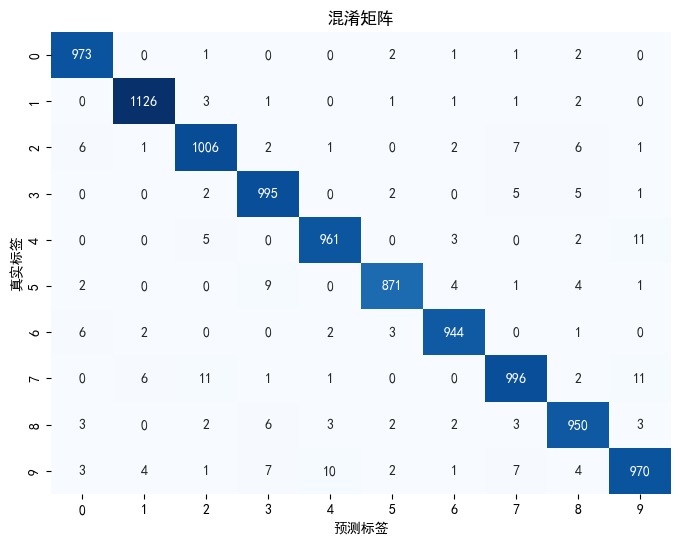

In [4]:
#导入绘制混淆矩阵和计算错误率的包
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib
def draw():
    # 设置中文字体，假设您使用的是 Windows 系统
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 (SimHei) 字体
    matplotlib.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
    # 计算混淆矩阵
    conf_matrix = confusion_matrix(y_test, y_pred)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    print(f"模型准确率: {accuracy:.2%}")

    # 绘制混淆矩阵
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("预测标签")
    plt.ylabel("真实标签")
    plt.title("混淆矩阵")
    plt.show()

draw()

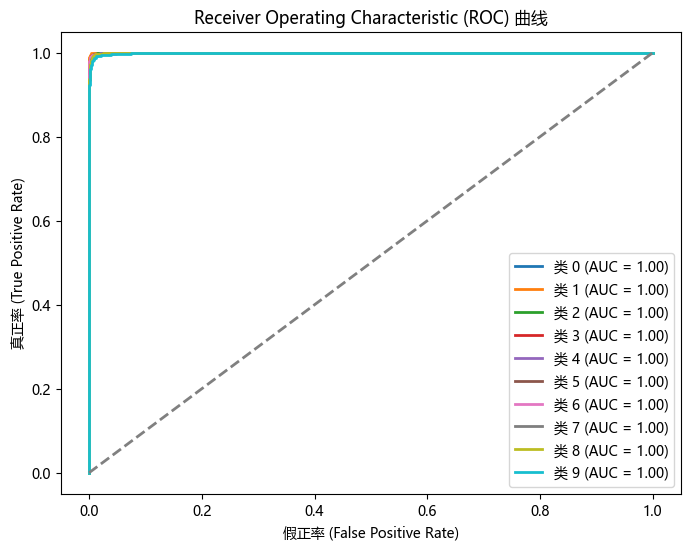

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib
# 绘制ROC曲线函数
def draw_roc_curve():
    # 设置中文字体，避免设置为 SimHei 时的错误
    try:
        matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体（适用于Windows）
    except:
        matplotlib.rcParams['font.sans-serif'] = ['Arial']  # 若无法找到微软雅黑，使用Arial字体
    matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

    # 获取预测的概率值
    y_proba = svm_model.predict_proba(x_test)  # 获取每个样本对各个类的预测概率

    # Binarize the labels (convert them to one-hot encoding)
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # Convert labels to binary format

    # 初始化绘图
    plt.figure(figsize=(8, 6))

    # 计算并绘制每个类的ROC曲线
    for i in range(10):  # 10类
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'类 {i} (AUC = {roc_auc:.2f})')

    # 绘制随机猜测的线
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

    # 添加标签和标题
    plt.xlabel('假正率 (False Positive Rate)')
    plt.ylabel('真正率 (True Positive Rate)')
    plt.title('Receiver Operating Characteristic (ROC) 曲线')
    plt.legend(loc='lower right')
    plt.show()


# 调用绘制ROC曲线的函数
draw_roc_curve()

## 6、手写输入识别功能


本部分使用Tkinter 库实现手写绘画输入功能，手写绘画后通过numpy库将图像数据转化为矩阵0-1，再使用训练好的模型进行分类。输出的结果依次为预测结果、图像和图像矩阵。

预测结果：7


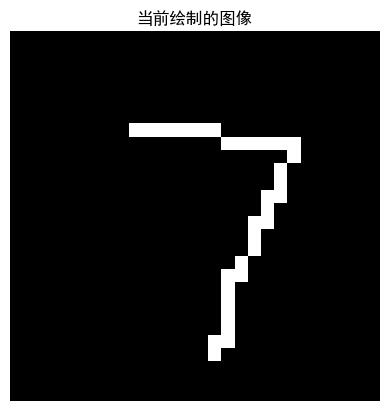

绘制的图像矩阵：
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0

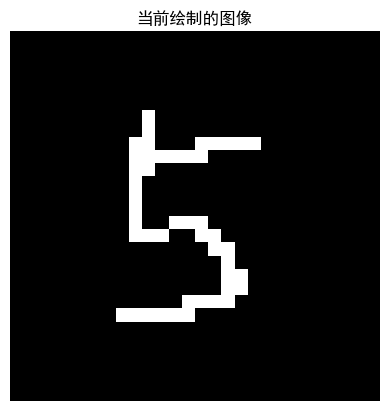

绘制的图像矩阵：
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0

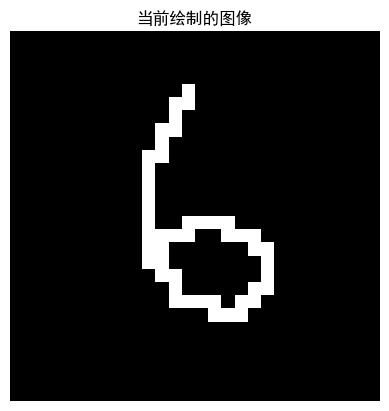

绘制的图像矩阵：
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0

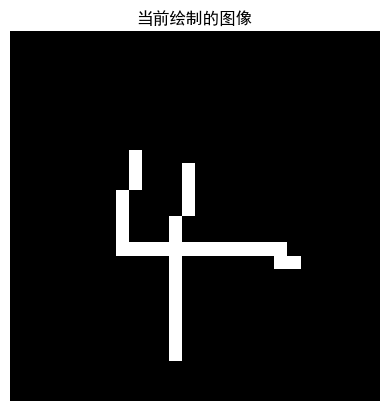

绘制的图像矩阵：
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0

In [1]:
import tkinter as tk
import numpy as np
import matplotlib
import joblib
from matplotlib import pyplot as plt
from joblib import load
from sklearn import svm

matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 (SimHei) 字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

class DigitRecognizerApp:
   
    def __init__(self, root):
        self.root = root
        self.root.title("手写数字识别")
        
        # 画布设置为 280x280，以便每个像素块为 10x10
        self.pixel_size = 10  # 每个像素块的大小
        self.canvas_size = 28 * self.pixel_size
        self.canvas = tk.Canvas(root, width=self.canvas_size, height=self.canvas_size, bg="white")
        self.canvas.grid(row=0, column=0, pady=2, sticky="W", columnspan=2)
        self.canvas.bind("<B1-Motion>", self.paint)
        
        # 28x28 的图像数组，用于保存绘图结果（未绘制区域为0，绘制区域为1）
        self.image_data = np.zeros((28, 28), dtype=float)  # 初始化为0，使用浮点数

        # 绘制网格
        self.draw_grid()

        # 按钮设置
        self.button_recognize = tk.Button(root, text="识别", command=self.recognize_digit)
        self.button_recognize.grid(row=1, column=0, pady=2)
        self.button_clear = tk.Button(root, text="清除", command=self.clear_canvas)
        self.button_clear.grid(row=1, column=1, pady=2)

        # 结果显示标签
        self.result_label = tk.Label(root, text="预测结果：")
        self.result_label.grid(row=2, column=0, columnspan=2)
        
    def draw_grid(self):
        # 在 Canvas 上绘制 28x28 的网格
        for i in range(0, self.canvas_size, self.pixel_size):
            self.canvas.create_line([(i, 0), (i, self.canvas_size)], fill="gray", width=1)
            self.canvas.create_line([(0, i), (self.canvas_size, i)], fill="gray", width=1)

    def paint(self, event):
        # 计算点击位置对应的 28x28 网格中的哪个像素
        x, y = event.x // self.pixel_size, event.y // self.pixel_size
        if 0 <= x < 28 and 0 <= y < 28:
            # 设置 1x1 区域为黑色，并在 image_data 中记录此像素为 1
            self.canvas.create_rectangle(
                x * self.pixel_size, y * self.pixel_size,
                (x + 1) * self.pixel_size, (y + 1) * self.pixel_size,
                fill="black", outline="black"
            )
            # 将绘制的像素设置为 1
            self.image_data[y, x] = 1.0  # 设置为浮点数 1.0

    def clear_canvas(self):
        # 清除画布和图像数组
        self.canvas.delete("all")
        self.image_data = np.zeros((28, 28), dtype=float)  # 重置为全0
        self.draw_grid()  # 重绘网格
   
    def recognize_digit(self):
        # 展平为一维向量并归一化
        image = self.image_data.reshape(1, -1)


        # 归一化处理，将值缩放到 0 到 1 之间
        image = image / np.max(image) if np.max(image) > 0 else image

        svm_model=joblib.load('svm_model.pkl')
        # 使用 SVM 模型预测
        prediction = svm_model.predict(image)
        print(f"预测结果：{prediction[0]}")

        # 显示预测结果
        self.result_label.config(text=f"预测结果：{prediction[0]}")

        # 输出 28x28 图像
        self.show_image()

    def show_image(self):
        # 直接显示 image_data 中的数据
        plt.imshow(self.image_data, cmap="gray", interpolation="nearest")
        plt.title("当前绘制的图像")
        plt.axis('off')  # 不显示坐标轴
        plt.show()
        # 打印 image_data 矩阵
        print("绘制的图像矩阵：")
        print(self.image_data)

# 创建并运行应用
root = tk.Tk()
app = DigitRecognizerApp(root)
root.mainloop()

## 7、结果评论与优化

# 二、基于随机森林算法的MNIST数据集手写数字识别 

## 1、训练模型  
训练参数设置：  
- `n_estimators=100`,               **树的个数 = 100** 
- `random_state=42`,                **随机种子 = 42**  
- `criterion='gini'`,               分裂节点标准 = 'gini'（基尼不纯度）  
- `max_depth=None`,                 树的最大深度 = None（所有子节点都是纯的）  
- `min_samples_split=2`,            分裂节点的最小样本数 = 2  
- `min_samples_leaf=1`,             叶子节点的最小样本数 = 1  
- `min_weight_fraction_leaf=0.0`,   叶节点的最小加权样本数 = 0.0  
- `max_features='sqrt'`,            每次分裂时考虑的最大特征数量 = 'sqrt'  
- `max_leaf_nodes=None`,            最大叶节点数 = None（不限制）  
- `min_impurity_decrease=0.0`,      最小不纯度减少 = 0.0  
- `bootstrap=True`,                 是否使用自举采样 = True  
- `oob_score=False`,                是否使用袋外样本来估计泛化精度 = False  
- `n_jobs=None`,                    并行作业数 = None（表示单线程）   
- `verbose=0`,                      详细程度 = 0  
- `warm_start=False`,               是否重用上次结果 = False  
- `class_weight=None`               类别权重 = None  


In [7]:
#导入随机森林sklearn包
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# 进行预测
y_pred = rf_model.predict(x_test)




## 2、绘制混淆矩阵和ROC曲线

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib
from sklearn.metrics import auc, confusion_matrix, accuracy_score, roc_curve
from sklearn.calibration import label_binarize
from sklearn.ensemble import RandomForestClassifier
# 计算混淆矩阵和准确率
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# 输出正确率
print(f"模型准确率: {accuracy:.2%}")

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

模型准确率: 97.04%


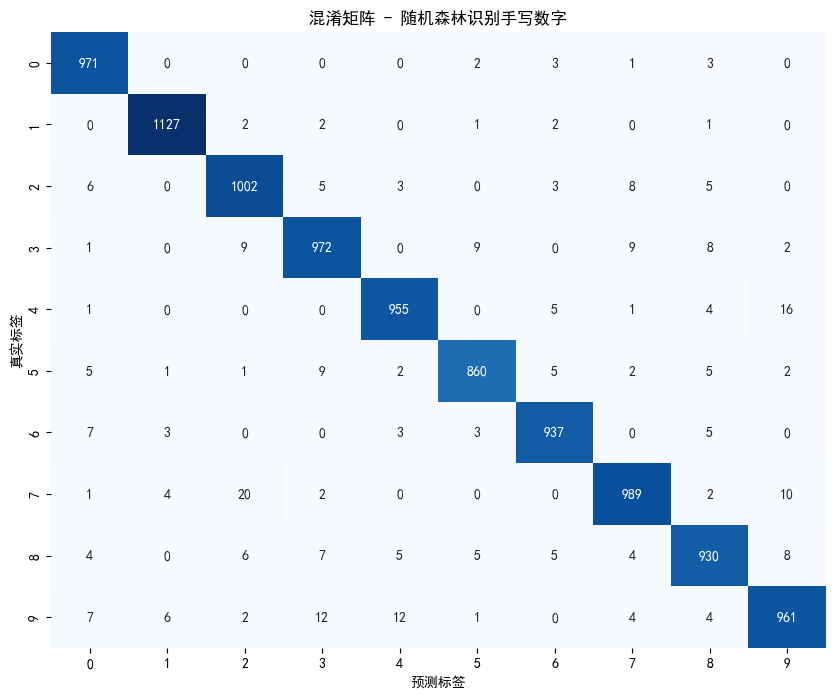

In [9]:
# 绘制混淆矩阵|
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("混淆矩阵 - 随机森林识别手写数字")
plt.show()

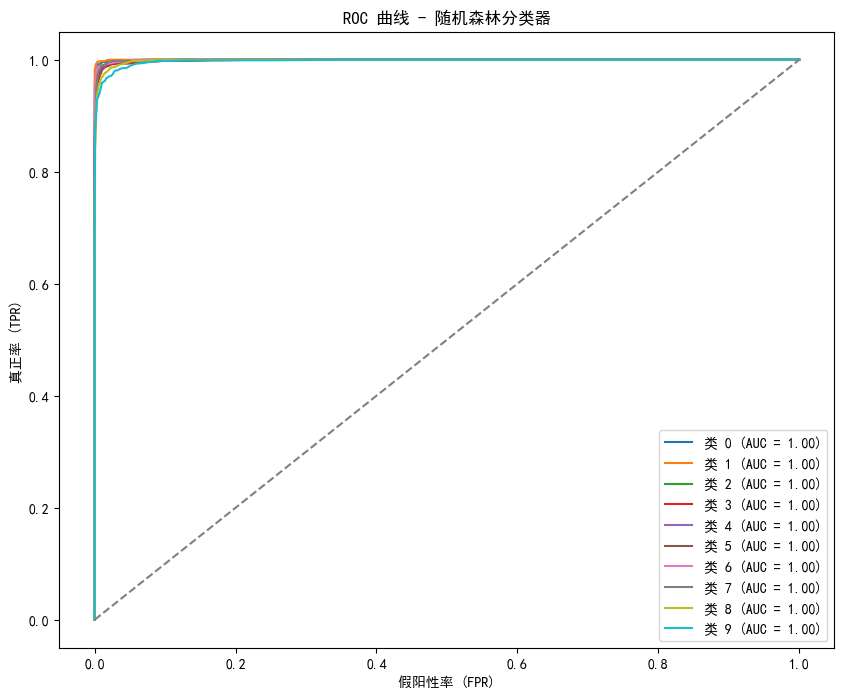

In [10]:
#ROC曲线
# ROC 曲线绘制
def plot_roc_curve(y_test, y_proba, n_classes):
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))  # 转换为二进制矩阵
    fpr, tpr, roc_auc = {}, {}, {}

    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f"类 {i} (AUC = {roc_auc[i]:.2f})")

    # 绘制对角线
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("假阳性率 (FPR)")
    plt.ylabel("真正率 (TPR)")
    plt.title("ROC 曲线 - 随机森林分类器")
    plt.legend(loc="lower right")
    plt.show()

# 多分类 ROC 曲线绘制
y_proba = rf_model.predict_proba(x_test)  # 获取所有类别的预测概率
n_classes = len(np.unique(y_test))
plot_roc_curve(y_test, y_proba, n_classes)

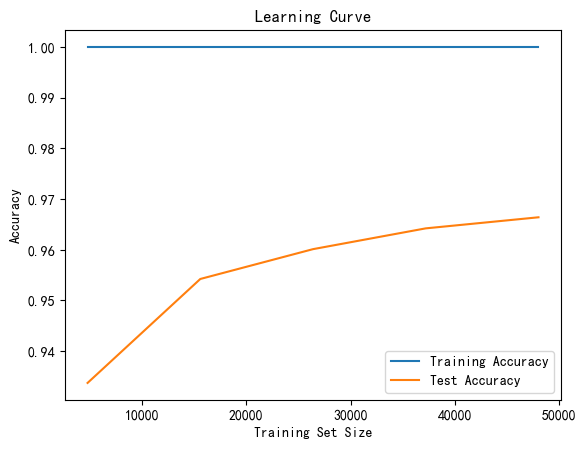

In [11]:
#学习曲线图
from sklearn.model_selection import learning_curve
# 计算学习曲线
train_sizes, train_scores, test_scores = learning_curve(rf_model, x_train, y_train, cv=5)

# 计算平均准确率
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# 绘制学习曲线
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


## 3、手写输入功能

In [12]:
import numpy as np
import tkinter as tk
from PIL import Image, ImageGrab
from joblib import load
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib
# 创建画布窗口
class DigitRecognizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("手写数字识别")
        
        self.clear_canvas
        # 画布设置为 280x280，以便每个像素块为 10x10
        self.pixel_size = 10  # 每个像素块的大小
        self.canvas_size = 28 * self.pixel_size
        self.canvas = tk.Canvas(root, width=self.canvas_size, height=self.canvas_size, bg="white")
        self.canvas.grid(row=0, column=0, pady=2, sticky="W", columnspan=2)
        self.canvas.bind("<B1-Motion>", self.paint)
        
        # 28x28 的图像数组，用于保存绘图结果（未绘制区域为0，绘制区域为1）
        self.image_data = np.ones((28, 28), dtype=int)

        # 绘制网格
        self.draw_grid()

        # 按钮设置
        self.button_recognize = tk.Button(root, text="识别", command=self.recognize_digit)
        self.button_recognize.grid(row=1, column=0, pady=2)
        self.button_clear = tk.Button(root, text="清除", command=self.clear_canvas)
        self.button_clear.grid(row=1, column=1, pady=2)

        # 结果显示标签
        self.result_label = tk.Label(root, text="预测结果：")
        self.result_label.grid(row=2, column=0, columnspan=2)

    def draw_grid(self):
        # 在 Canvas 上绘制 28x28 的网格
        for i in range(0, self.canvas_size, self.pixel_size):
            self.canvas.create_line([(i, 0), (i, self.canvas_size)], fill="gray", width=1)
            self.canvas.create_line([(0, i), (self.canvas_size, i)], fill="gray", width=1)

    def paint(self, event):
        # 计算点击位置对应的 28x28 网格中的哪个像素
        x, y = event.x // self.pixel_size, event.y // self.pixel_size
        if 0 <= x < 28 and 0 <= y < 28:
            # 设置 1x1 区域为黑色，并在 image_data 中记录此像素为 1
            self.canvas.create_rectangle(
                x * self.pixel_size, y * self.pixel_size,
                (x + 2) * self.pixel_size, (y + 2) * self.pixel_size,
                fill="black", outline="black"
            )
            self.image_data[y, x] = 1  # 将绘制的像素设置为 1
            self.image_data[y, x - 1] = 1
            self.image_data[y, x + 1] = 1
            self.image_data[y -1, x] = 1
            self.image_data[y + 1, x] = 1 
            self.image_data[y -1, x -1] = 1
            self.image_data[y - 1, x + 1] = 1
            self.image_data[y +1, x -1] = 1 
            self.image_data[y +1, x +1] = 1      

    def clear_canvas(self):
        # 清除画布和图像数组
        self.canvas.delete("all")
        self.image_data = np.zeros((28, 28), dtype=int)  # 重置为未绘制的1
        self.draw_grid()  # 重绘网格

    def recognize_digit(self):
        # 展平为一维向量
        image = self.image_data.reshape(1, -1)

        # 使用 SVM 模型预测
        prediction = rf_model.predict(image)
        print(f"预测结果：{prediction[0]}")

        # 显示预测结果
        self.result_label.config(text=f"预测结果：{prediction[0]}")

        # 输出 28x28 图像
        self.show_image()

    def show_image(self):
        # 直接显示 image_data 中的数据
        plt.imshow(self.image_data, cmap="gray", interpolation="nearest")
        plt.title("当前绘制的图像")
        plt.axis('off')  # 不显示坐标轴
        plt.show()
            # 打印 image_data 矩阵
        print("绘制的图像矩阵：")
        print(self.image_data)

# 创建并运行应用
root = tk.Tk()
app = DigitRecognizerApp(root)
root.mainloop()

## 4、欠采样、过采样时间、准确率对比




欠采样(下采样)和过采样(上采样)都是用于平衡样本数量，防止对某一类别过拟合同时避免样本数量少的类欠拟合的方法。 <br><br> 
  1、**欠采样**(下采样)：通过减少多数类样本的数量与少数样本接近，从而达到平衡数据集的方法。欠采样的主要有随机欠采样、Tomek Links、Near Miss和ENN等方法。<br><br> 
   代码使用的欠采样方法为：**随机欠采样**。
                随机欠采样的实现方法非常简单，原理为随机选择多数样本的一部分进行删除，只到与少数样本的数量一致便可。<br><br><br>&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;
                **优点**:适用于大规模数据集且样本冗余度高的情况，实现简单快速。<br><br>&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;
                **缺点**:可能删除一些重要样本，当多数类与少数类样本数量差距过大时，丢失信息过多。<br><br><br>
2、**过采样**(上采样)：通过复制少数类样本，使其数量接近多数类样本，从而达到平衡数据集的方法。过采样的主要有随机过采样、SMOTE和ADASYN等方法。<br><br>
   代码使用的欠采样方法为：**随机过采样**。原理与随机欠采样相似，只是针对的是少数类的样本并且操作改为了复制<br><br><br>&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;
                **优点**:适合处理简单数据集、简单、便捷<br><br>&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;
                **缺点**:不适合处理复杂数据集<br><br><br>

C:\Users\邓刘\AppData\Local\Temp\ipykernel_9404\1040367501.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


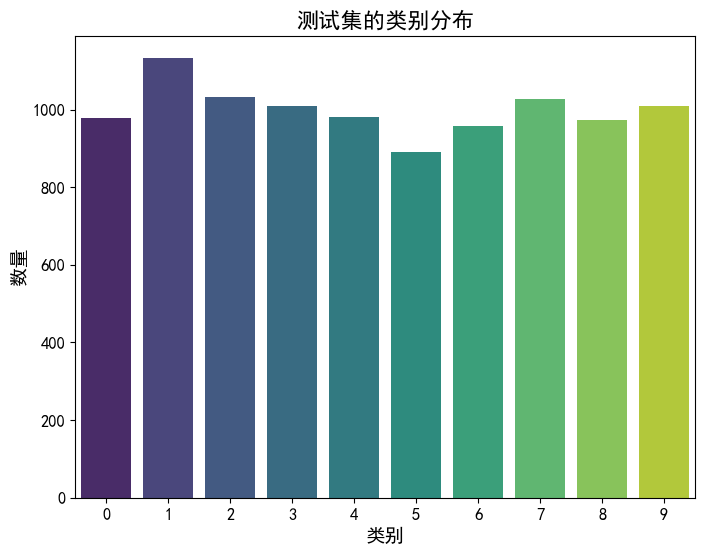

C:\Users\邓刘\AppData\Local\Temp\ipykernel_9404\1040367501.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


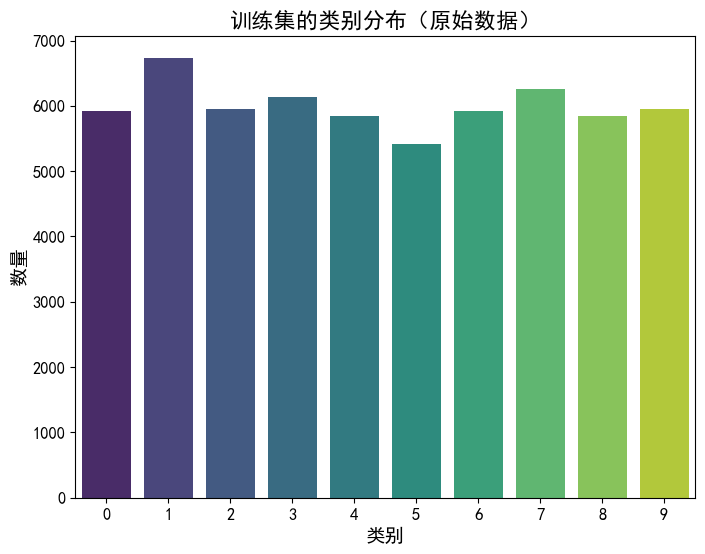

C:\Users\邓刘\AppData\Local\Temp\ipykernel_9404\1040367501.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


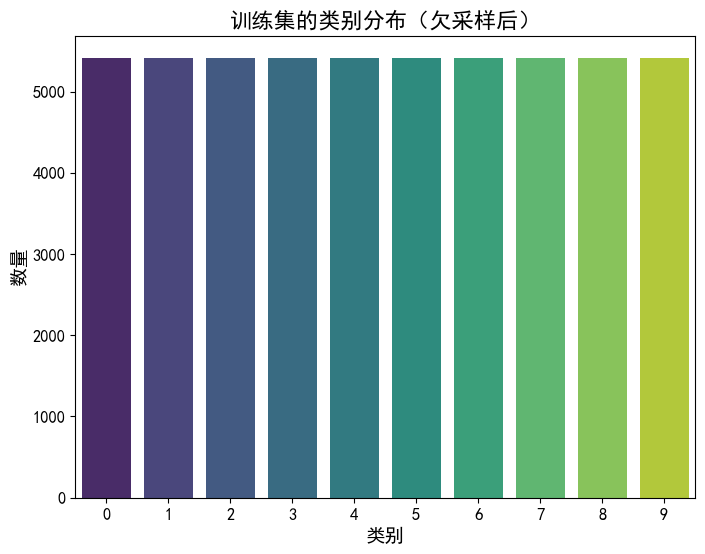

C:\Users\邓刘\AppData\Local\Temp\ipykernel_9404\1040367501.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


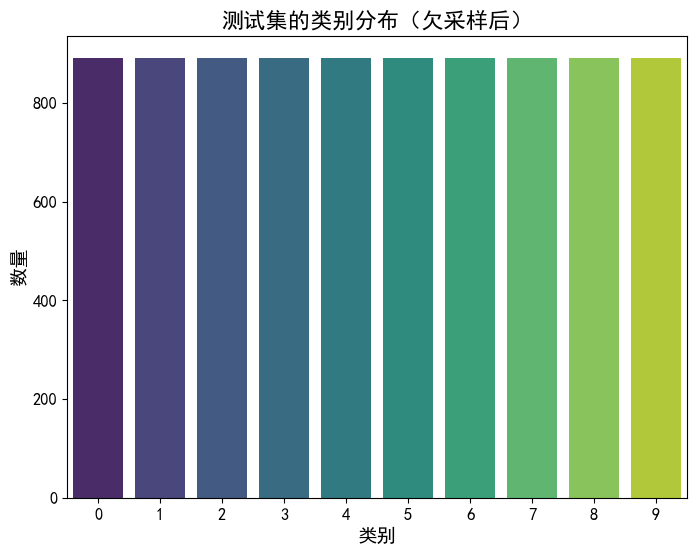

C:\Users\邓刘\AppData\Local\Temp\ipykernel_9404\1040367501.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


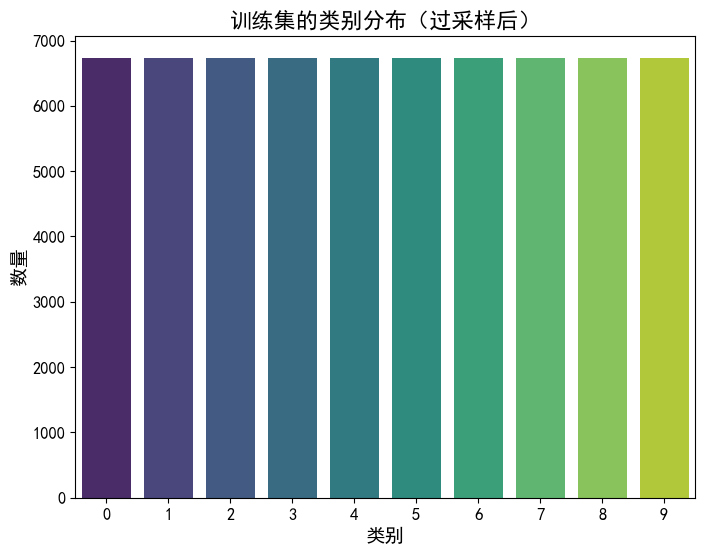

开始训练和测试...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
原始数据最佳参数: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
原始数据最佳验证准确率: 96.18%
原始数据运行时间: 73.64 秒
原始数据测试集准确率: 96.80%


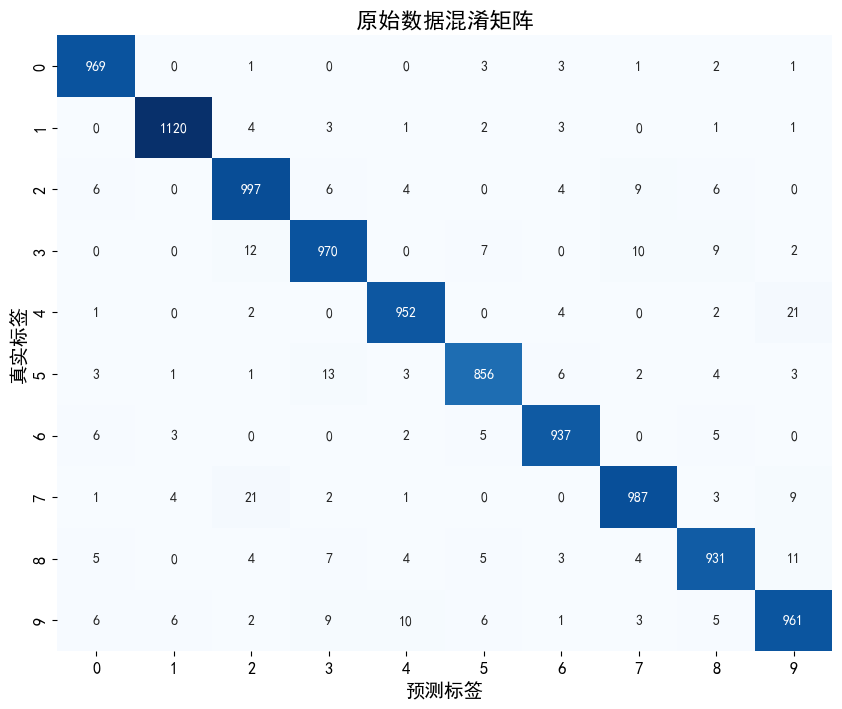

Fitting 3 folds for each of 1 candidates, totalling 3 fits
(测试集-原始)欠采样数据最佳参数: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
(测试集-原始)欠采样数据最佳验证准确率: 96.28%
(测试集-原始)欠采样数据运行时间: 64.05 秒
(测试集-原始)欠采样数据测试集准确率: 96.56%


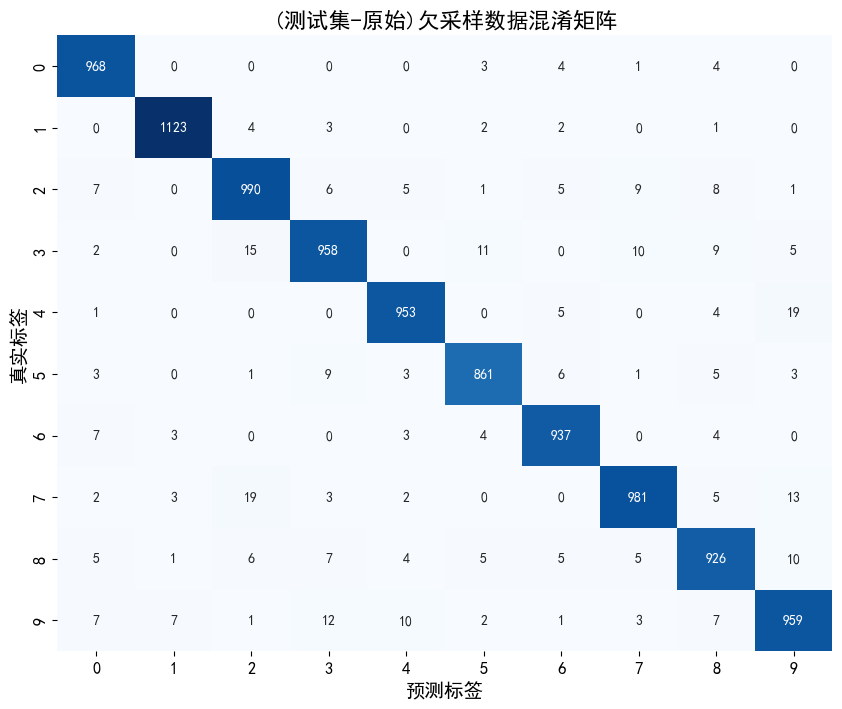

Fitting 3 folds for each of 1 candidates, totalling 3 fits
(测试集-原始)过采样数据最佳参数: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
(测试集-原始)过采样数据最佳验证准确率: 98.16%
(测试集-原始)过采样数据运行时间: 72.27 秒
(测试集-原始)过采样数据测试集准确率: 96.66%


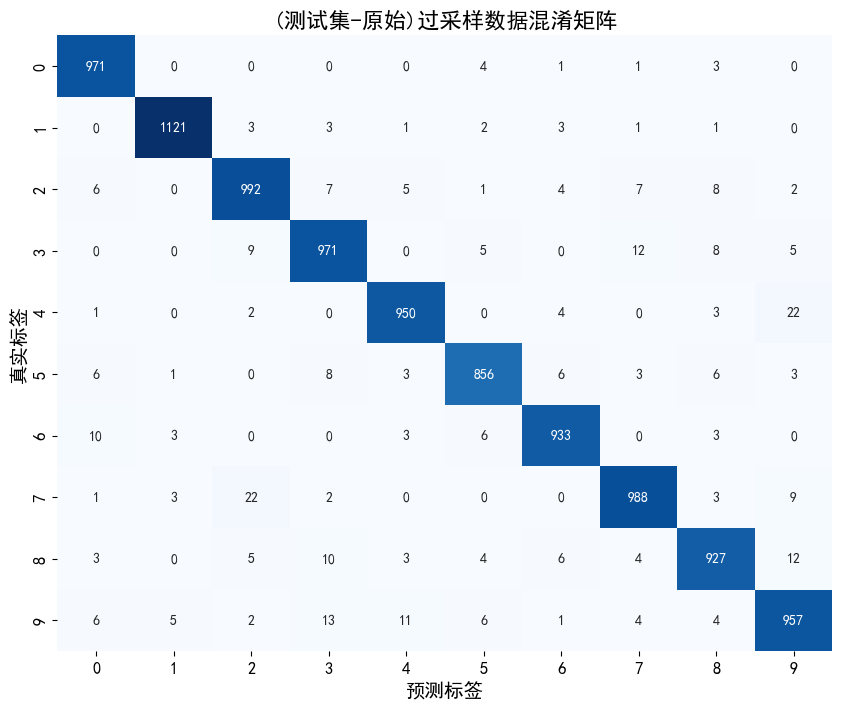

Fitting 3 folds for each of 1 candidates, totalling 3 fits
原始数据(欠采样)最佳参数: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
原始数据(欠采样)最佳验证准确率: 96.18%
原始数据(欠采样)运行时间: 69.56 秒
原始数据(欠采样)测试集准确率: 96.87%


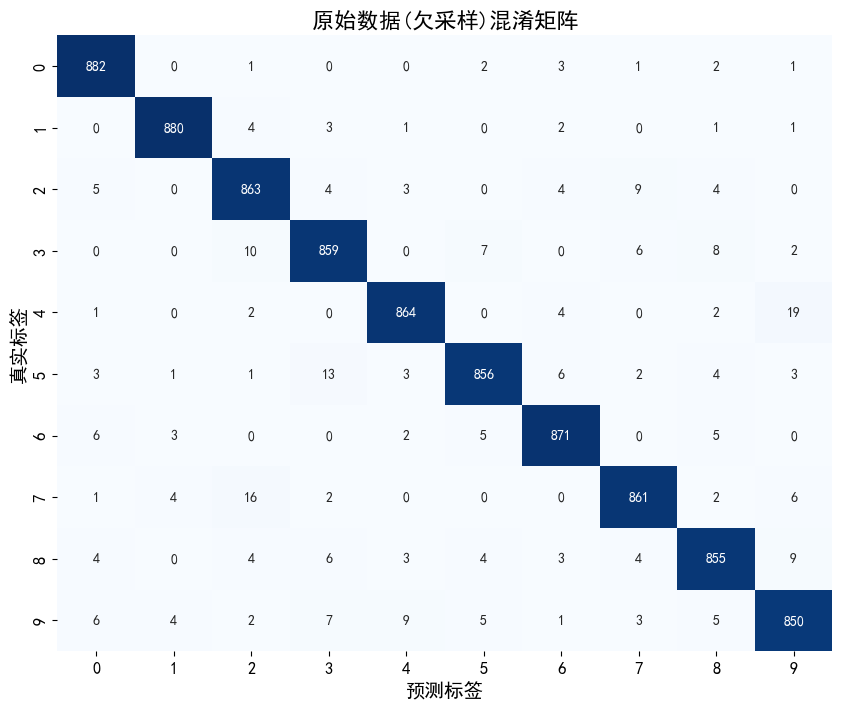

Fitting 3 folds for each of 1 candidates, totalling 3 fits
(测试集-欠采样)欠采样数据最佳参数: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
(测试集-欠采样)欠采样数据最佳验证准确率: 96.28%
(测试集-欠采样)欠采样数据运行时间: 62.67 秒
(测试集-欠采样)欠采样数据测试集准确率: 96.66%


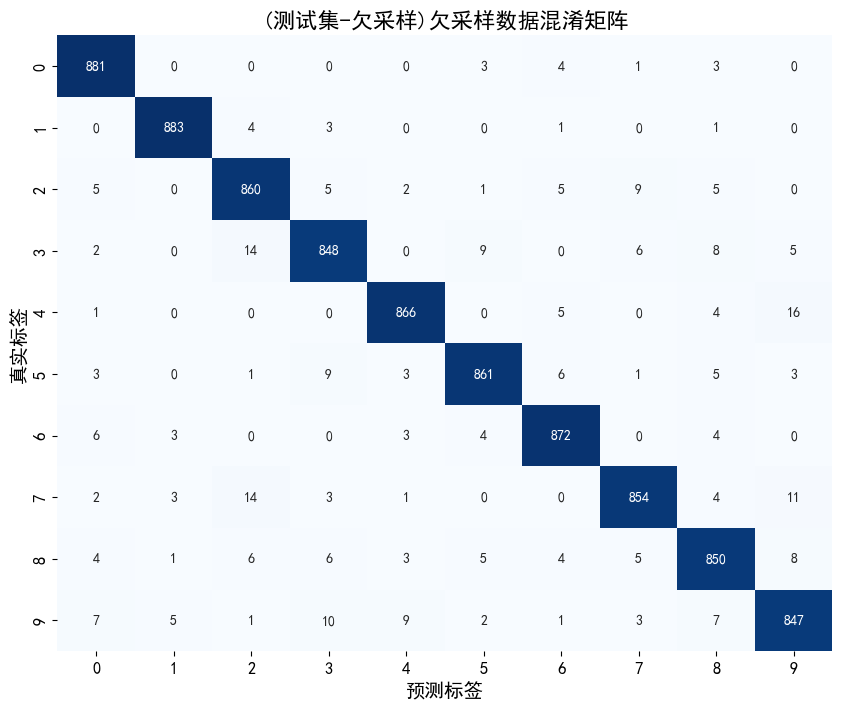

Fitting 3 folds for each of 1 candidates, totalling 3 fits
(测试集-欠采样)过采样数据最佳参数: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
(测试集-欠采样)过采样数据最佳验证准确率: 98.16%
(测试集-欠采样)过采样数据运行时间: 69.26 秒
(测试集-欠采样)过采样数据测试集准确率: 96.69%


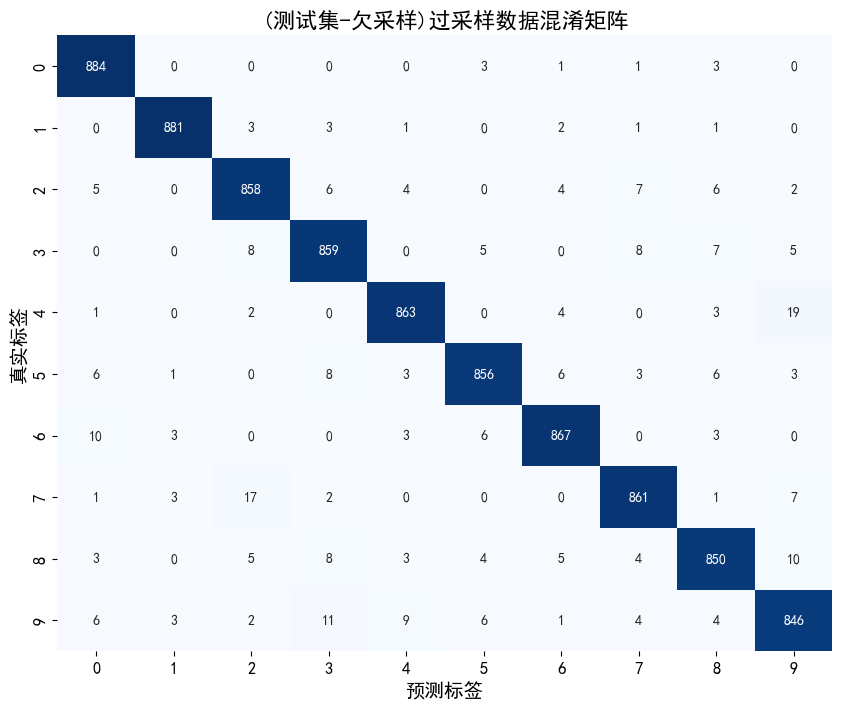

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


   数据类型  测试集准确率    运行时间（秒）
0  原始数据  0.9680  73.643225
1   欠采样  0.9656  64.047165
2   过采样  0.9666  72.272408
        数据类型    测试集准确率    运行时间（秒）
0  原始数据(欠采样)  0.968722  69.563603
1        欠采样  0.966592  62.672732
2        过采样  0.966928  69.256565


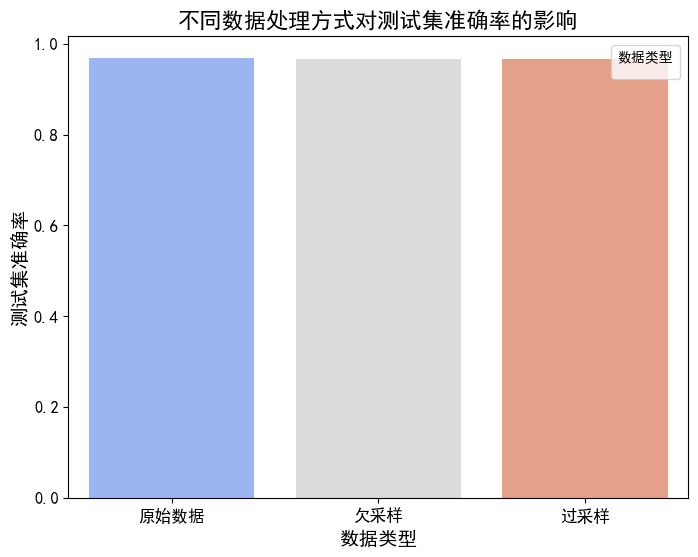

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


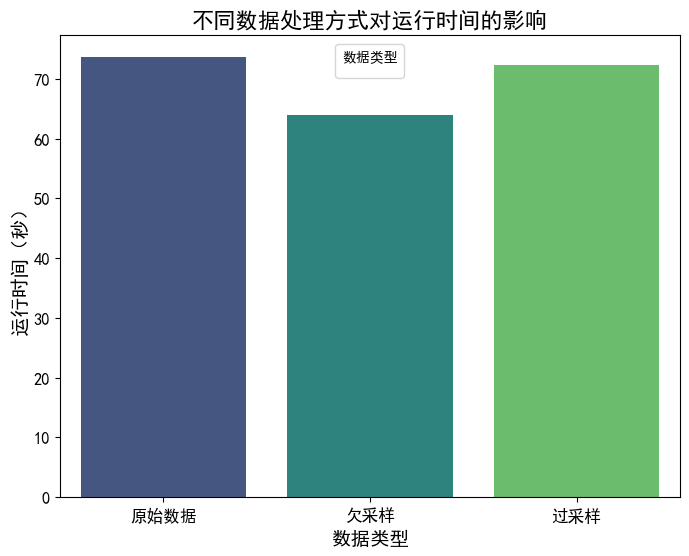

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# 设置 Matplotlib 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False   # 解决坐标轴负号显示问题


x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# 数据预处理
x_train = x_train.reshape(-1, 28 * 28)  # 展平
x_test = x_test.reshape(-1, 28 * 28)  # 展平
x_train = x_train / 255.0  # 归一化
x_test = x_test / 255.0  # 归一化

# 设置临时目录（避免并行搜索内存不足）
os.environ["JOBLIB_TEMP_FOLDER"] = "D:/temp"

# 数据分布可视化
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y, palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel("类别", fontsize=14)
    plt.ylabel("数量", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

plot_class_distribution(y_test,"测试集的类别分布")
plot_class_distribution(y_train, "训练集的类别分布（原始数据）")

# 手动实现欠采样
def under_sample(x, y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    min_class_count = min(class_counts)  # 找到最少样本类别的数量
    sampled_indices = np.hstack([
        np.random.choice(np.where(y == cls)[0], min_class_count, replace=False)
        for cls in unique_classes
    ])
    return x[sampled_indices], y[sampled_indices]

x_train_under, y_train_under = under_sample(x_train, y_train)
plot_class_distribution(y_train_under, "训练集的类别分布（欠采样后）")

x_test_under,y_test_under = under_sample(x_test, y_test)
plot_class_distribution(y_test_under, "测试集的类别分布（欠采样后）")

# 手动实现过采样
def over_sample(x, y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    max_class_count = max(class_counts)  # 找到最多样本类别的数量
    sampled_indices = np.hstack([
        np.random.choice(np.where(y == cls)[0], max_class_count, replace=True)
        for cls in unique_classes
    ])
    return x[sampled_indices], y[sampled_indices]

x_train_over, y_train_over = over_sample(x_train, y_train)
plot_class_distribution(y_train_over, "训练集的类别分布（过采样后）")

# 定义随机森林模型和超参数
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
}

# 定义函数：训练模型并输出结果
def train_and_evaluate(x_train, y_train, x_test, y_test, description):
    start_time = time()
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    elapsed_time = time() - start_time

    # 输出最佳参数和测试集准确率
    print(f"{description}最佳参数: {grid_search.best_params_}")
    print(f"{description}最佳验证准确率: {grid_search.best_score_:.2%}")
    print(f"{description}运行时间: {elapsed_time:.2f} 秒")
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{description}测试集准确率: {accuracy:.2%}")

    # 绘制混淆矩阵
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{description}混淆矩阵", fontsize=16)
    plt.xlabel("预测标签", fontsize=14)
    plt.ylabel("真实标签", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    return accuracy, elapsed_time

# 测试模型
print("开始训练和测试...")
#原始测试集合
acc_original, time_original = train_and_evaluate(x_train, y_train, x_test, y_test, "原始数据")
acc_under, time_under = train_and_evaluate(x_train_under, y_train_under, x_test, y_test, "(测试集-原始)欠采样数据")
acc_over, time_over = train_and_evaluate(x_train_over, y_train_over, x_test, y_test, "(测试集-原始)过采样数据")

#欠采样的测试集合
acc_original_two, time_original_two = train_and_evaluate(x_train, y_train, x_test_under, y_test_under, "原始数据(欠采样)")
acc_under_two, time_under_two = train_and_evaluate(x_train_under, y_train_under, x_test_under, y_test_under, "(测试集-欠采样)欠采样数据")
acc_over_two, time_over_two = train_and_evaluate(x_train_over, y_train_over, x_test_under, y_test_under, "(测试集-欠采样)过采样数据")
# 汇总结果
results = pd.DataFrame({
    "数据类型": ["原始数据", "欠采样", "过采样"],
    "测试集准确率": [acc_original, acc_under, acc_over],
    "运行时间（秒）": [time_original, time_under, time_over]
    
})
results_two = pd.DataFrame({
    "数据类型": ["原始数据(欠采样)", "欠采样", "过采样"],
    "测试集准确率": [acc_original_two, acc_under_two, acc_over_two],
    "运行时间（秒）": [time_original_two, time_under_two, time_over_two]
    
})
print(results)
print(results_two)

# 可视化测试集准确率
plt.figure(figsize=(8, 6))
sns.barplot(x="数据类型", y="测试集准确率", hue="数据类型", dodge=False, data=results, palette="coolwarm")
plt.title("不同数据处理方式对测试集准确率的影响", fontsize=16)
plt.xlabel("数据类型", fontsize=14)
plt.ylabel("测试集准确率", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="数据类型", fontsize=12)
plt.show() 

# 可视化运行时间
plt.figure(figsize=(8, 6))
sns.barplot(x="数据类型", y="运行时间（秒）", hue="数据类型", dodge=False, data=results, palette="viridis")
plt.title("不同数据处理方式对运行时间的影响", fontsize=16)
plt.xlabel("数据类型", fontsize=14)
plt.ylabel("运行时间（秒）", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="数据类型", fontsize=12)
plt.show()

  在对训练数据进行过采样后，精度下降了0.14%，时间降低了1.87%。对数据进行欠采样后，精度下降了0.24%，**时间降低了13%**。<br>综合比较采样方式对该训练集样本的精度和时间效率的影响，进行欠采样对模型精度影响小，时间效率高。<br>  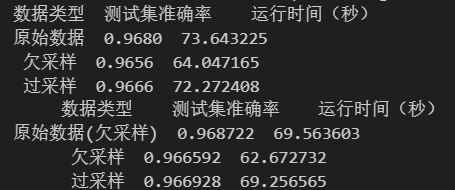

## 5、测试集合欠采样基础上的参数优化

在对训练集欠采样的基础上，使用了 GridSearchCV 来找到最佳的超参数组合，调整了以下几个关键参数：

n_estimators：即随机森林中树的数量。这里的树越多，模型可能会更强大，但也会变得更慢。所以我们调整了树的数量，看哪一个组合能提供更好的性能。

max_depth：树的最大深度。这个参数控制每颗树的复杂度，深度越大，模型越复杂，可能会出现过拟合的风险。所以我们测试了不同的深度，找到一个平衡点。

max_features：每颗树在分裂节点时，最多使用多少个特征。这个参数影响每颗树的多样性，过少可能导致树之间相似度高，过多则可能导致计算复杂度增加。因此，我们也调整了这个参数，看哪个组合效果最好。

min_samples_split：一个节点最少要有多少样本才能继续分裂。这个参数决定了树的分裂过程，样本太少可能导致树的深度过大，从而导致过拟合。通过调整这个参数，可以控制每颗树的结构，避免过度拟合。

X_train_under shape after reshaping: (54210, 784)
X_test_under shape after reshaping: (8920, 784)
Fitting 2 folds for each of 216 candidates, totalling 432 fits
Training Time: 66440.73 seconds


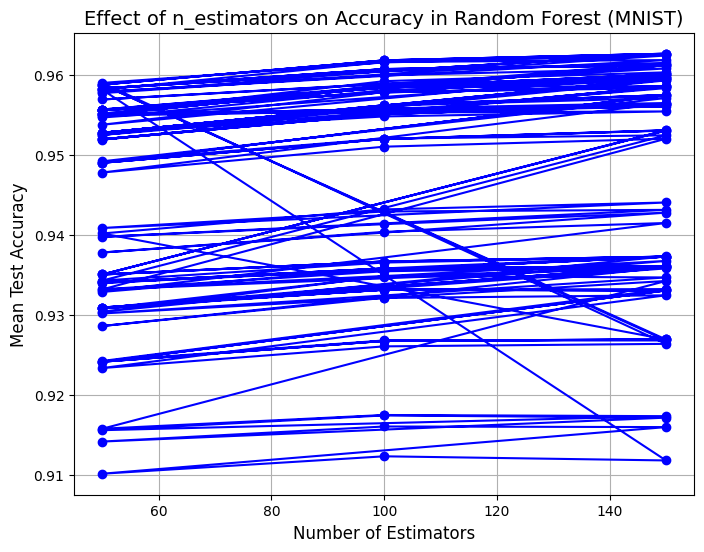

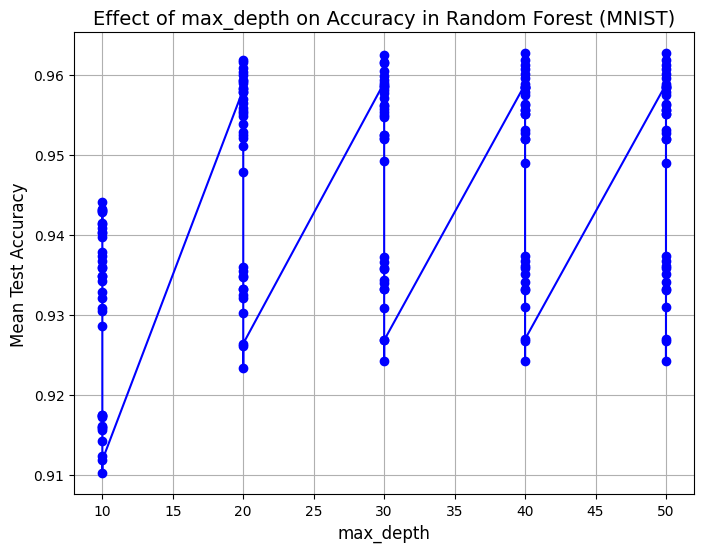

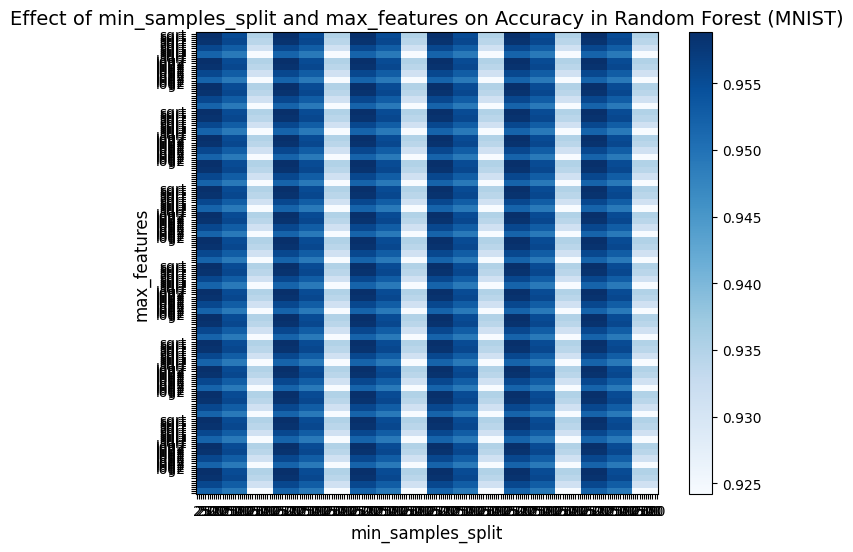

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}
Accuracy on Test Set:  0.9687219730941704
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       892
           1       0.99      0.99      0.99       892
           2       0.96      0.97      0.96       892
           3       0.96      0.96      0.96       892
           4       0.97      0.97      0.97       892
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       892
           7       0.97      0.96      0.96       892
           8       0.96      0.96      0.96       892
           9       0.95      0.95      0.95       892

    accuracy                           0.97      8920
   macro avg       0.97      0.97      0.97      8920
weighted avg       0.97      0.97      0.97      8920



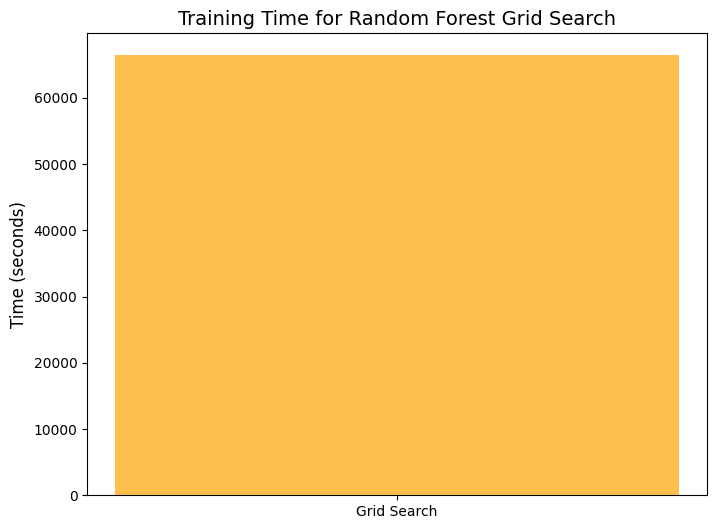

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import time  # 导入时间模块



# 手动实现欠采样
def under_sample(x, y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    min_class_count = min(class_counts)  # 找到最少样本类别的数量
    sampled_indices = np.hstack([  # 从每个类别中随机选择等量样本
        np.random.choice(np.where(y == cls)[0], min_class_count, replace=False)
        for cls in unique_classes
    ])
    return x[sampled_indices], y[sampled_indices]

# 对训练集进行欠采样
X_train_under, y_train_under = under_sample(x_train, y_train)

# 对测试集进行欠采样
X_test_under, y_test_under = under_sample(x_test, y_test)

# 确保数据是2D的（样本数, 特征数）
X_train_under = X_train_under.reshape(X_train_under.shape[0], -1)
X_test_under = X_test_under.reshape(X_test_under.shape[0], -1)

# 检查展平后的维度
print(f"X_train_under shape after reshaping: {X_train_under.shape}")
print(f"X_test_under shape after reshaping: {X_test_under.shape}")

# 设置调参范围：max_depth, n_estimators, max_features, min_samples_split
param_grid = {
    'n_estimators': [50, 100, 150],  # 树的数量
    'max_depth': [None, 10, 20, 30, 40, 50],  # 树的最大深度
    'max_features': ['sqrt', 'log2', None],  # 最大特征数
    'min_samples_split': [2, 5, 10, 20]  # 最小样本分裂数
}

# 创建RandomForestClassifier模型
rf = RandomForestClassifier(random_state=42)

# 使用较少的交叉验证折数（cv=2）以减少计算时间
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, verbose=1, n_jobs=1, scoring='accuracy')

# 记录训练开始时间
start_time = time.time()

# 训练模型（使用欠采样后的训练集）
grid_search.fit(X_train_under, y_train_under)

# 记录训练结束时间
end_time = time.time()

# 计算训练时间
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# 获取调参结果
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# 处理参数组合与结果
n_estimators = results['param_n_estimators'].data
max_depth_values = results['param_max_depth'].data
max_features_values = results['param_max_features'].data
min_samples_split_values = results['param_min_samples_split'].data

# 绘制性能图：n_estimators与准确率的关系
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, mean_test_scores, marker='o', color='b', linestyle='-', markersize=6)
plt.title('Effect of n_estimators on Accuracy in Random Forest (MNIST)', fontsize=14)
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Mean Test Accuracy', fontsize=12)
plt.grid(True)
plt.savefig('random_forest_n_estimators.png')
plt.show()

# 绘制性能图：max_depth与准确率的关系
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, mean_test_scores, marker='o', color='b', linestyle='-', markersize=6)
plt.title('Effect of max_depth on Accuracy in Random Forest (MNIST)', fontsize=14)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Mean Test Accuracy', fontsize=12)
plt.grid(True)
plt.savefig('random_forest_max_depth.png')
plt.show()

# 创建一个二维数组来存储不同 min_samples_split 和 max_features 组合下的结果
score_matrix = np.zeros((len(min_samples_split_values), len(max_features_values)))

# 填充 score_matrix
for i, min_samples in enumerate(min_samples_split_values):
    for j, max_features in enumerate(max_features_values):
        score_matrix[i, j] = mean_test_scores[
            (results['param_min_samples_split'] == min_samples) &
            (results['param_max_features'] == max_features)
        ][0]

# 绘制 heatmap 图：min_samples_split与max_features的组合影响
plt.figure(figsize=(8, 6))
plt.imshow(score_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Effect of min_samples_split and max_features on Accuracy in Random Forest (MNIST)', fontsize=14)
plt.xlabel('min_samples_split', fontsize=12)
plt.ylabel('max_features', fontsize=12)
plt.xticks(np.arange(len(min_samples_split_values)), min_samples_split_values)
plt.yticks(np.arange(len(max_features_values)), max_features_values)
plt.colorbar()
plt.savefig('random_forest_min_samples_split_max_features.png')
plt.show()

# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳模型进行预测
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_under)

# 打印分类报告
print("Accuracy on Test Set: ", accuracy_score(y_test_under, y_pred))
print(classification_report(y_test_under, y_pred))

# 将训练时间与其他指标一起绘制（例如准确率）
plt.figure(figsize=(8, 6))

# 绘制训练时间图
plt.bar(['Grid Search'], [training_time], color='orange', alpha=0.7)
plt.title('Training Time for Random Forest Grid Search', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=12)
plt.savefig('random_forest_training_time.png')
plt.show()


## 6、特征工程:分箱法

将数据按指定个数为一组(一箱)，可将连续的变量转化为离散的变量。同时将减少特征个数，达到降低特征个数的功能。<br>**优点**：降低异常值影响 **缺点**：可能会丢失信息。

['x_test', 'x_train', 'y_train', 'y_test']
x_train-shape: (60000, 28, 28)  y_train-shape:(60000,)
x_test-shape: (10000, 28, 28)  y_test-shape:(10000,)
Results Table:
         Bins  Accuracy  Time (seconds)
0  No Binning    0.9704       46.091322
1           5    0.9692       23.076388
2          10    0.9694       25.758912
3          20    0.9710       28.320109
4          50    0.9704       33.759759
5         100    0.9693       39.074374


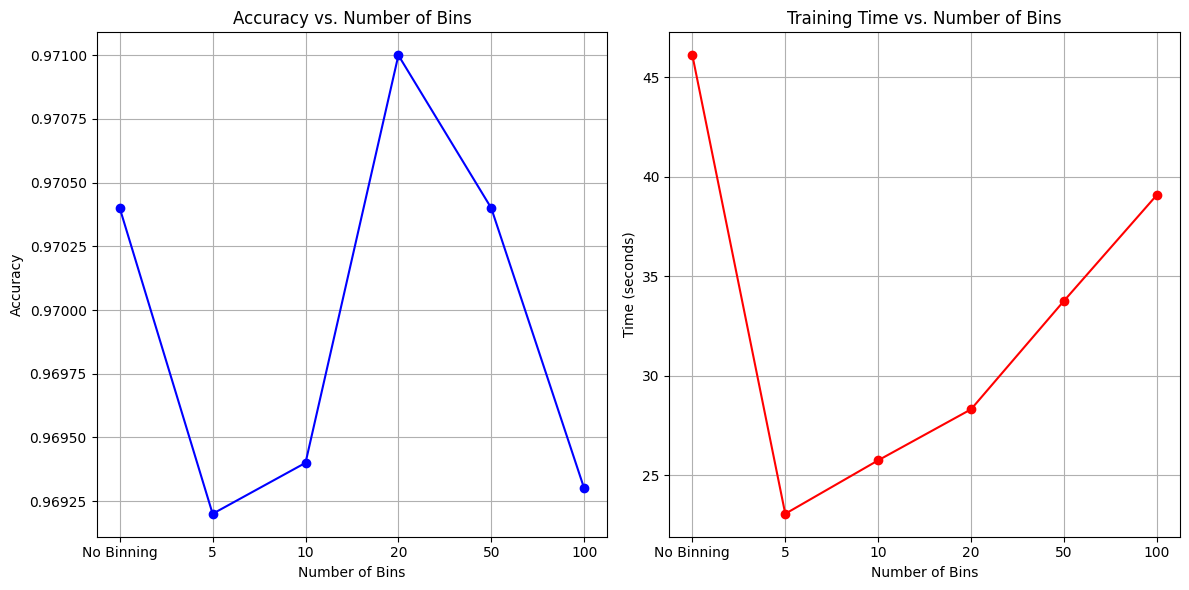

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# 数据集路径
path = 'c:/Users/邓刘/Desktop/机器学习实践/手写数据/mnist.npz'
# 导入数据
data = np.load(path)

# 查看数组名称
print(data.files)

# 将训练与测试数据提取出来
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# 查看形状
print(f"x_train-shape: {x_train.shape}  y_train-shape:{y_train.shape}")
print(f"x_test-shape: {x_test.shape}  y_test-shape:{y_test.shape}")

# 数据标准化：归一化 (x-min)/(max - min)
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

# 将样本展开成一维
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# 对每个像素值进行分箱操作
def binning(data, num_bins):
    """将每个像素值进行分箱处理"""
    bin_edges = np.linspace(0, 1, num_bins + 1)  # 创建分箱的边界
    binned_data = np.digitize(data, bin_edges[1:-1])  # 使用bin_edges进行离散化
    return binned_data

def box_train(num_bins):
    start_time = time()  # 记录训练开始时间
    # 对训练集和测试集进行分箱
    x_train_binned = np.apply_along_axis(binning, axis=1, arr=x_train, num_bins=num_bins)
    x_test_binned = np.apply_along_axis(binning, axis=1, arr=x_test, num_bins=num_bins)

    # 训练随机森林分类器
    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # 训练模型
    rf.fit(x_train_binned, y_train)

    # 预测测试集
    y_pred = rf.predict(x_test_binned)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)

    end_time = time()  # 记录训练结束时间
    elapsed_time = end_time - start_time  # 计算训练用时
    return accuracy, elapsed_time

def no_binning_train():
    start_time = time()  # 记录训练开始时间
    # 训练随机森林分类器（不做分箱）
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)

    # 预测测试集
    y_pred = rf.predict(x_test)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)

    end_time = time()  # 记录训练结束时间
    elapsed_time = end_time - start_time  # 计算训练用时
    return accuracy, elapsed_time

def box_main():
    results = []  # 用于存储结果

    # 添加不分箱的结果
    accuracy, elapsed_time = no_binning_train()
    results.append(["No Binning", accuracy, elapsed_time])

    num_bins_list = [5, 10, 20, 50, 100]  # 设定不同的分箱数

    # 试验不同的分箱数
    for num_bins in num_bins_list:
        accuracy, elapsed_time = box_train(num_bins)  # 使用不同的分箱数
        results.append([num_bins, accuracy, elapsed_time])
    
    # 将结果保存到 DataFrame 中
    results_df = pd.DataFrame(results, columns=["Bins", "Accuracy", "Time (seconds)"])

    # 输出结果表格
    print("Results Table:")
    print(results_df)
    
    # 将Bins列转为字符串类型
    results_df["Bins"] = results_df["Bins"].astype(str)

    # 绘制准确率和训练时间图
    plt.figure(figsize=(12, 6))

    # 绘制准确率图
    plt.subplot(1, 2, 1)
    plt.plot(results_df["Bins"], results_df["Accuracy"], marker='o', color='b', label='Accuracy')
    plt.title("Accuracy vs. Number of Bins")
    plt.xlabel("Number of Bins")
    plt.ylabel("Accuracy")
    plt.grid(True)

    # 绘制训练时间图
    plt.subplot(1, 2, 2)
    plt.plot(results_df["Bins"], results_df["Time (seconds)"], marker='o', color='r', label='Time')
    plt.title("Training Time vs. Number of Bins")
    plt.xlabel("Number of Bins")
    plt.ylabel("Time (seconds)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# 运行主函数
box_main()


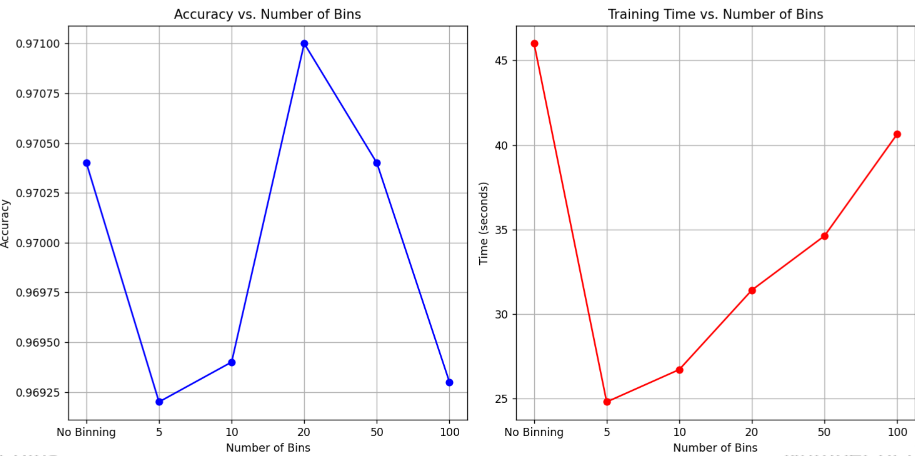<br>从结果可以看出最优分箱区间为20，精确度不仅**提高**了0.06%！而且**时间降低了31.6%**。由此可以看到对于本数据集选取合适的分箱区间，可以在不降低精确度的情况下大大降低时间！

## 7、基于分箱工程上的PCA降维

No Binning Results Table:
No Binning           | Accuracy: 0.9704, Time: 43.9609
PCA (3)              | Accuracy: 0.5066, Time: 17.5393
PCA (5)              | Accuracy: 0.7590, Time: 27.4174
PCA (8)              | Accuracy: 0.8949, Time: 26.3267
PCA (10)             | Accuracy: 0.9130, Time: 38.6083

20 Bins Results Table:
20 Bins              | Accuracy: 0.9710, Time: 28.5563
PCA (3)              | Accuracy: 0.5041, Time: 17.2641
PCA (5)              | Accuracy: 0.7614, Time: 26.8268
PCA (8)              | Accuracy: 0.8950, Time: 25.8826
PCA (10)             | Accuracy: 0.9130, Time: 39.8173


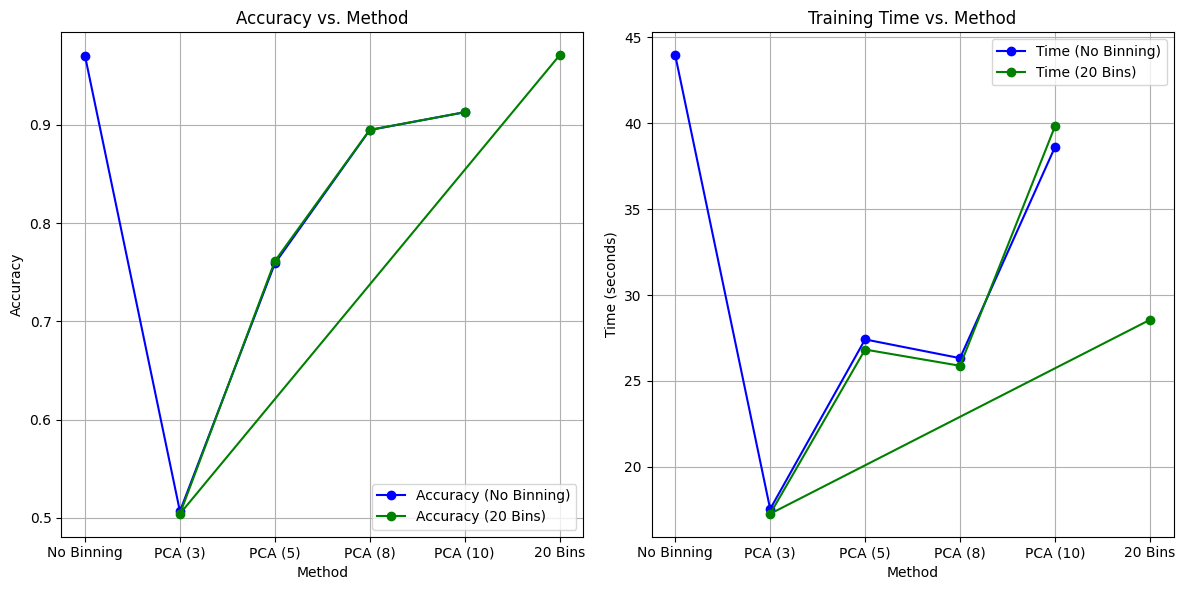

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 数据集路径
path = 'c:/Users/邓刘/Desktop/机器学习实践/手写数据/mnist.npz'
# 导入数据
data = np.load(path)

# 将训练与测试数据提取出来
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# 数据标准化：归一化 (x-min)/(max - min)
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

# 将样本展开成一维
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

def binning(data, num_bins):
    """将每个像素值进行分箱处理"""
    bin_edges = np.linspace(0, 1, num_bins + 1)  # 创建分箱的边界
    binned_data = np.digitize(data, bin_edges[1:-1])  # 使用bin_edges进行离散化
    return binned_data.reshape(-1)  # 确保返回的是一维数组

# 不分箱训练
def no_binning_train():
    start_time = time()
    # 训练随机森林分类器（不做分箱）
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)

    # 预测测试集
    y_pred = rf.predict(x_test)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time()  # 记录训练结束时间
    elapsed_time = end_time - start_time  # 计算训练用时
    return accuracy, elapsed_time

# 分箱为20的训练
def box_train(num_bins=20):
    start_time = time()
    # 对训练集和测试集进行分箱
    x_train_binned = np.apply_along_axis(binning, axis=1, arr=x_train, num_bins=num_bins)
    x_test_binned = np.apply_along_axis(binning, axis=1, arr=x_test, num_bins=num_bins)

    # 训练随机森林分类器
    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # 训练模型
    rf.fit(x_train_binned, y_train)

    # 预测测试集
    y_pred = rf.predict(x_test_binned)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time()  # 记录训练结束时间
    elapsed_time = end_time - start_time  # 计算训练用时
    return accuracy, elapsed_time

# PCA降维函数
def pca_reduce(x_train, x_test, n_components=50):
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    return x_train_pca, x_test_pca

# PCA后训练
def pca_train(x_train_pca, x_test_pca):
    start_time = time()
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x_train_pca, y_train)
    y_pred = rf.predict(x_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time()
    elapsed_time = end_time - start_time
    return accuracy, elapsed_time

def box_main(pca_components_list=[3, 5, 8, 10]):
    # 初始化结果
    results_no_binning = []
    results_box_20 = []

    # 1. 不做分箱训练
    accuracy, elapsed_time = no_binning_train()
    results_no_binning.append(["No Binning", accuracy, elapsed_time])

    # 进行PCA降维和训练
    for pca_components in pca_components_list:
        # 进行PCA降维
        x_train_pca, x_test_pca = pca_reduce(x_train, x_test, n_components=pca_components)

        # PCA降维后的训练
        accuracy_pca, elapsed_time_pca = pca_train(x_train_pca, x_test_pca)
        results_no_binning.append([f"PCA ({pca_components})", accuracy_pca, elapsed_time_pca])

    # 2. 分箱为20的训练
    accuracy, elapsed_time = box_train(20)
    results_box_20.append([f"20 Bins", accuracy, elapsed_time])

    # 进行PCA降维和训练（分箱为20的情况）
    for pca_components in pca_components_list:
        # 进行PCA降维
        x_train_pca, x_test_pca = pca_reduce(x_train, x_test, n_components=pca_components)

        # PCA降维后的训练
        accuracy_pca, elapsed_time_pca = pca_train(x_train_pca, x_test_pca)
        results_box_20.append([f"PCA ({pca_components})", accuracy_pca, elapsed_time_pca])

    # 将结果保存到 DataFrame 中
    results_no_binning_df = pd.DataFrame(results_no_binning, columns=["Method", "Accuracy", "Time (seconds)"])
    results_box_20_df = pd.DataFrame(results_box_20, columns=["Method", "Accuracy", "Time (seconds)"])

    # 输出No Binning的结果
    print("No Binning Results Table:")
    for index, row in results_no_binning_df.iterrows():
        print(f"{row['Method']: <20} | Accuracy: {row['Accuracy']:.4f}, Time: {row['Time (seconds)']:.4f}")

    # 输出20 Bins的结果
    print("\n20 Bins Results Table:")
    for index, row in results_box_20_df.iterrows():
        print(f"{row['Method']: <20} | Accuracy: {row['Accuracy']:.4f}, Time: {row['Time (seconds)']:.4f}")

    # **修复问题**：将 "Method" 列转为字符串类型
    results_no_binning_df["Method"] = results_no_binning_df["Method"].astype(str)
    results_box_20_df["Method"] = results_box_20_df["Method"].astype(str)

    # 绘制准确率和训练时间图
    plt.figure(figsize=(12, 6))

    # 绘制准确率图
    plt.subplot(1, 2, 1)
    plt.plot(results_no_binning_df["Method"], results_no_binning_df["Accuracy"], marker='o', color='b', label='Accuracy (No Binning)')
    plt.plot(results_box_20_df["Method"], results_box_20_df["Accuracy"], marker='o', color='g', label='Accuracy (20 Bins)')
    plt.title("Accuracy vs. Method")
    plt.xlabel("Method")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()

    # 绘制训练时间图
    plt.subplot(1, 2, 2)
    plt.plot(results_no_binning_df["Method"], results_no_binning_df["Time (seconds)"], marker='o', color='b', label='Time (No Binning)')
    plt.plot(results_box_20_df["Method"], results_box_20_df["Time (seconds)"], marker='o', color='g', label='Time (20 Bins)')
    plt.title("Training Time vs. Method")
    plt.xlabel("Method")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# 运行主函数，传入PCA的主成分个数列表
box_main(pca_components_list=[3, 5, 8, 10])  # 可以根据需要调整主成分的数量


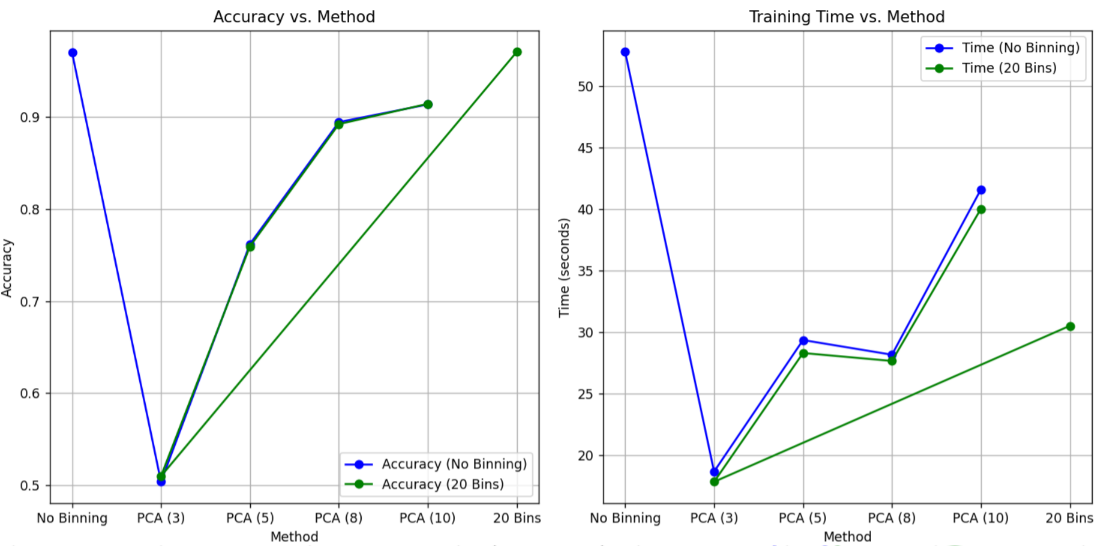  <br>从结果看出无论是进行了分箱还是未分箱的数据，在主成分数量3-10区间内准确率并不高，而且随着主成分数量增高用时也明显增高。因此对于本数据集集不进行主成分分析更有利于模型性能和准确率。

# 三、基于卷积神经网络的MNIST数据集手写数字识别

## 1、训练模型

In [14]:
# 导入必要的库
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# 将标签转为one-hot编码
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 划分验证集
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 恢复数据为原来的形状 (28,28,1) 以适应CNN输入
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 构建CNN模型
model = models.Sequential()

# 添加卷积层 + 激活层 + 最大池化层
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 展开为一维向量
model.add(layers.Flatten())

# 添加全连接层
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 输出层，用于分类10个类别

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型结构
model.summary()

# 训练模型
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(x_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## 2、绘制混淆矩阵和计算正确率

313/313 [==============================] - 1s 3ms/step


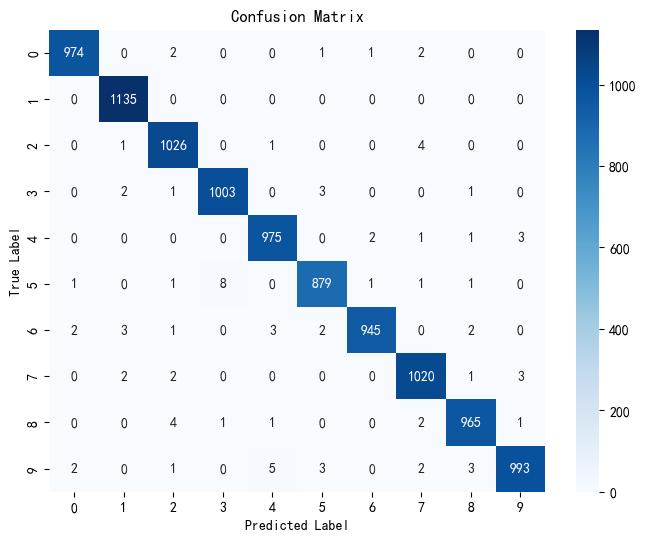

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# 预测
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# 混淆矩阵可视化
def plot_confusion_matrix(y_true, y_pred_classes):
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
# 绘制混淆矩阵
plot_confusion_matrix(y_test_classes, y_pred_classes)

## 3、绘制ROC曲线

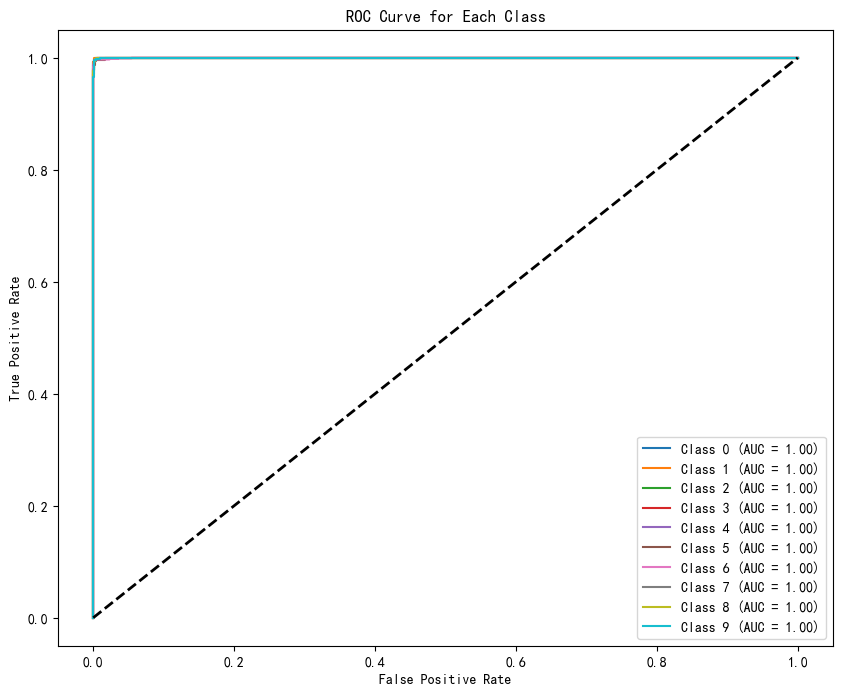

In [16]:
# ROC 曲线可视化
def plot_roc_curve(y_true, y_pred):
    # One-hot 编码的 y_true 和 y_pred
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=2)  # 对角线
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Each Class")
    plt.legend(loc="lower right")
    plt.show()
# 绘制 ROC 曲线
plot_roc_curve(y_test, y_pred)


## 4、输入、特征优化

## 4、手写功能

1/1 [==============================] - 0s 14ms/step


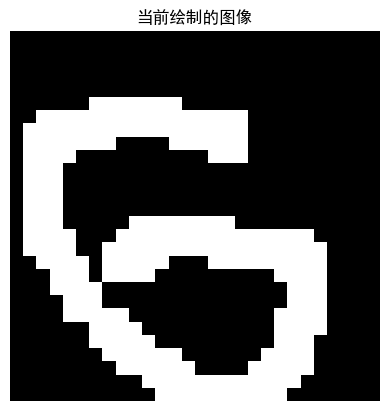

绘制的图像矩阵：
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

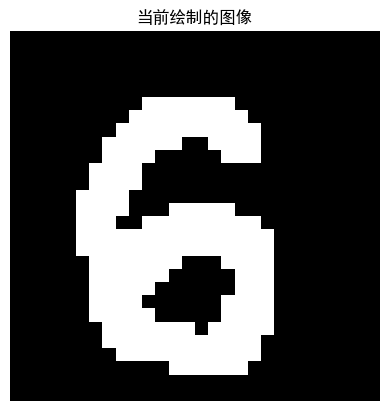

绘制的图像矩阵：
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0

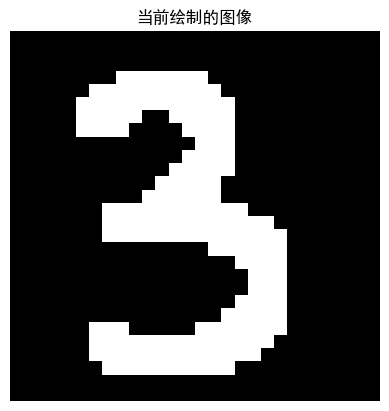

绘制的图像矩阵：
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0

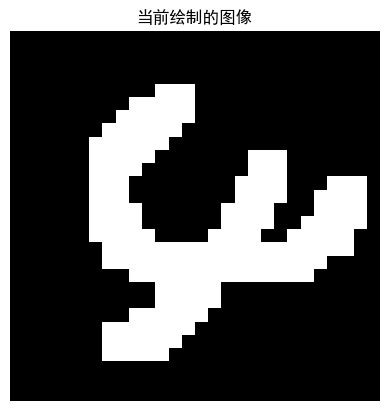

绘制的图像矩阵：
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [18]:
# 创建画布窗口
class DigitRecognizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("手写数字识别")
        
        # 画布设置为 280x280，以便每个像素块为 10x10
        self.pixel_size = 10  # 每个像素块的大小
        self.canvas_size = 28 * self.pixel_size
        self.canvas = tk.Canvas(root, width=self.canvas_size, height=self.canvas_size, bg="white")
        self.canvas.grid(row=0, column=0, pady=2, sticky="W", columnspan=2)
        self.canvas.bind("<B1-Motion>", self.paint)

        # 28x28 的图像数组，用于保存绘图结果（未绘制区域为0，绘制区域为1）
        self.image_data = np.zeros((28, 28), dtype=int)

        # 绘制网格
        self.draw_grid()

        # 按钮设置
        self.button_recognize = tk.Button(root, text="识别", command=self.recognize_digit)
        self.button_recognize.grid(row=1, column=0, pady=2)
        self.button_clear = tk.Button(root, text="清除", command=self.clear_canvas)
        self.button_clear.grid(row=1, column=1, pady=2)

        # 结果显示标签
        self.result_label = tk.Label(root, text="预测结果：")
        self.result_label.grid(row=2, column=0, columnspan=2)

    def draw_grid(self):
        # 在 Canvas 上绘制 28x28 的网格
        for i in range(0, self.canvas_size, self.pixel_size):
            self.canvas.create_line([(i, 0), (i, self.canvas_size)], fill="gray", width=1)
            self.canvas.create_line([(0, i), (self.canvas_size, i)], fill="gray", width=1)

    def paint(self, event):
        # 计算点击位置对应的 28x28 网格中的哪个像素
        x, y = event.x // self.pixel_size, event.y // self.pixel_size
        if 0 <= x < 28 and 0 <= y < 28:
            # 设置 3x3 区域为黑色，并在 image_data 中记录此像素为 1
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < 28 and 0 <= ny < 28:
                        self.image_data[ny, nx] = 1  # 将绘制的像素设置为 1
                        self.canvas.create_rectangle(
                            nx * self.pixel_size, ny * self.pixel_size,
                            (nx + 1) * self.pixel_size, (ny + 1) * self.pixel_size,
                            fill="black", outline="black"
                        )

    def clear_canvas(self):
        # 清除画布和图像数组
        self.canvas.delete("all")
        self.image_data = np.zeros((28, 28), dtype=int)  # 重置为未绘制的0
        self.draw_grid()  # 重绘网格

    def recognize_digit(self):
        # 数据预处理
        image = self.image_data.astype("float32") / 1.0  # 归一化
        image = image.reshape(1, 28, 28, 1)  # 调整形状

        # 使用 CNN 模型预测
        prediction = model.predict(image)
        predicted_digit = np.argmax(prediction)

        # 显示预测结果
        self.result_label.config(text=f"预测结果：{predicted_digit}")

        # 输出 28x28 图像
        self.show_image()

    def show_image(self):
        # 直接显示 image_data 中的数据
        plt.imshow(self.image_data, cmap="gray", interpolation="nearest")
        plt.title("当前绘制的图像")
        plt.axis('off')  # 不显示坐标轴
        plt.show()
        # 打印 image_data 矩阵
        print("绘制的图像矩阵：")
        print(self.image_data)

# 创建并运行应用
root = tk.Tk()
app = DigitRecognizerApp(root)
root.mainloop()
